# Polinomios de Taylor

### EJERCICIO 4.- 
### Sea $f(x) = \log(x)$.

### a) Calcula su polinomio de Taylor de orden 4 centrado en $x_0 = 2$.

### b) Representa gráficamente $f(x)$ y el polinomio de Taylor anterior, en un intervalo donde se aprecie la diferencia entre ambas funciones.

### c) Calcula una aproximación de $\log(2.5)$ utilizando el polinomio de Taylor.

### d) Da una cota superior del error absoluto cometido por la aproximación (c).

### e) Haz una gráfica donde se aprecie el error cometido, es decir, $|f − P |$, el punto $(2.5, 0)$ y la cota hallada en el apartado (d). Según la gráfica, intuitivamente, ¿para qué valores de $x$ se podría aproximar $f(x)$ con un error menor que la cota hallada?


SOLUCIÓN:

Definimos la función $f(x) = \log(x)$

In [1]:
f(x)=log(x)

In [2]:
f

x |--> log(x)

### Apartado a) Calcula su polinomio de Taylor de orden 4 centrado en $x_0 = 2$.

El polinomio de Taylor de orden 4 centrado en el 2 es:

In [3]:
P(x)=taylor(f,x,2,4) 
P(x)

-1/64*(x - 2)^4 + 1/24*(x - 2)^3 - 1/8*(x - 2)^2 + 1/2*x + log(2) - 1

### Apartado b) Representa gráficamente $f(x)$ y el polinomio de Taylor anterior, en un intervalo donde se aprecie la diferencia entre ambas funciones.

La representación gráfica de $f(x)$ y su polinomio de Taylor es:

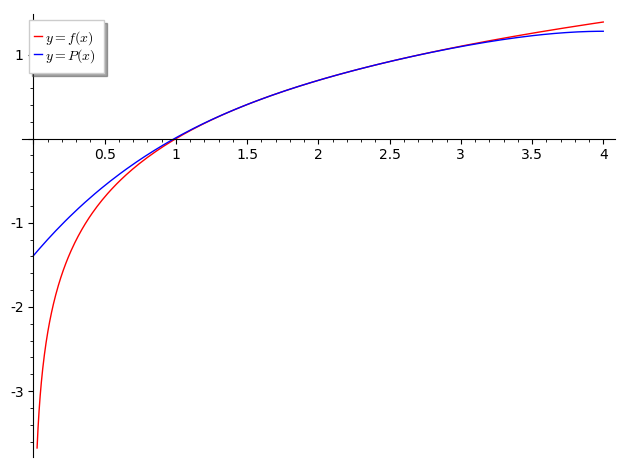

In [4]:
plot(f,(x,0,4),legend_label='$y=f(x)$',color='red')+plot(P,(x,0,4),legend_label='$y=P(x)$')

### Apartado c) Calcula una aproximación de $\log(2.5)$ utilizando el polinomio de Taylor.

La aproximación pedida es

In [5]:
aprox=P(2.5).n(); 
aprox

0.916128951393279

¡CUIDADO! Si ponemos en el anterior comando 

In [6]:
aprox=P(2.5);

aprox

log(2) + 0.222981770833333


### Apartado d) Da una cota superior del error absoluto cometido por la aproximación (c).

OBSERVACIÓN GENERAL:

Sabemos que la expresión del error para el polinomio de Taylor $P_n(x)=P_n(f,a)(x)$ de la función $f$ centrado en el punto $a$, de grado $\leq n$, viene dada por 

$$|f(x)-P_n(x)|\leq \frac{\|f^{(n+1)}\|_{[a,x]}}{(n+1)!}|x-a|^{n+1}$$

Por tanto, debemos estimar 

$$M_n=\|f^{(n+1)}\|_{[a,x]}$$ 

EN EL CASO EN EL QUE NOS COMPETE

En concreto, para $x=2.5$ y $a=2$

$$|f(2.5)-P_n(2.5)|\leq \frac{\|f^{(n+1)}\|_{[2,2.5]}}{(n+1)!}|2.5-2|^{n+1}$$
y estimamos

$$M_n=\|f^{(n+1)}\|_{[2,2.5]}$$

Como las sucesivas derivadas de $\log(t)$ son $1/t$, $-1/t^{2}$, $2/t^{3}$,  $-6/t^{4}$, podemos concluir que $f^{(n+1)}=(-1)^{n+1}n!/t^{n+1}$ para todo n.

En nuestro caso, $n=4$, luego, 

$$M_4=4!/2^{5}$$

Por tanto, la cota es: 

In [7]:
M=factorial(4)*2^(-5)
M

3/4

In [8]:
cota=M*0.5^(5)/factorial(5)
cota

0.000195312500000000

Comprobamos que la cota es correcta.

In [9]:
error=abs(f(2.5)-P(2.5)).n()
error

0.000161780480876561

In [10]:
error.n() < cota.n()

True

OTRA FORMA DE ACOTAR:

Mostramos gráficamente la función y observamos a ojo cual es la cota del error.

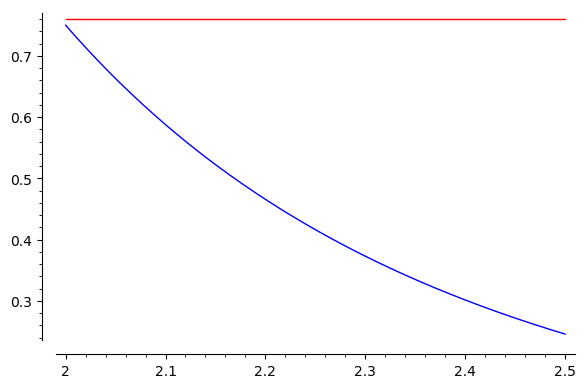

In [11]:
plot(abs(diff(f(x),x,5)),(x,2,2.5))+plot(0.76,(x,2,2.5),color='red')

Podemos tomar $M_4=0.76$ para la cota

In [12]:
cota2=0.76*0.5^(5)/factorial(5)
cota2

0.000197916666666667

In [13]:
error.n() < cota2.n()

True

### Apartado e) Haz una gráfica donde se aprecie el error cometido, es decir, $|f − P |$, el punto $(2.5, 0)$ y la cota hallada en el apartado (d). Según la gráfica, intuitivamente, ¿para qué valores de $x$ se podría aproximar $f(x)$ con un error menor que la cota hallada?

En la siguiente gráfica se aprecia que alrededor del intervalo $[1.3,2.8]$ (más o menos) el polinomio aproxima la función con un error menor o igual que la cota hallada. Es más, el intervalo $[1.6,2.5]$ se mantiene por debajo de la cota hallada. También dibujamos el punto $(2.5,0)$ tal y como nos piden en el enunciado del problema.

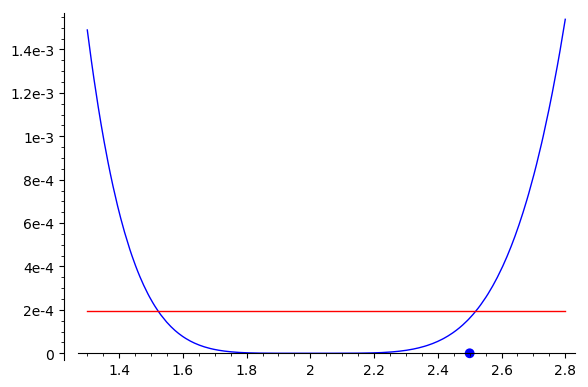

In [14]:
plot(abs(f(x)-P(x)),(x,1.3,2.8))+plot(cota,(x,1.3,2.8),color='red')+point2d([[2.5,0]],size=50)

Si queremos más precisión, tan sólo hay que encontrar los puntos de intersección de las dos curvas:

In [15]:
a=find_root (abs(f(x)-P(x)) - cota, 1,2 ) 
a

1.5218912697109852

In [16]:
b=find_root (abs(f(x)-P(x)) - cota, 2,3 ) 
b

2.5198997112842196

Con lo cual el intervalo es:

In [18]:
[a,b]

[1.5218912697109852, 2.5198997112842196]